# MTF example

## Geometry

We consider $N$ disjoint spheres in $\mathbb{R}^3$, with the following notation:
- Position vectors of the sphere centers: $\mathbf{p_j} \in \mathbb{R}^3$, with $j \in \{1, ..., N\}$.
- Radii: $\tilde{r}_j \in \mathbb{R}^+$, with $j \in \{1, ..., N\}$.
- Interior of sphere $j$: $\Omega_j$, with $j \in \{1, ..., N\}$.
- Boundary of sphere $j$: $\Gamma_j := \partial \Omega_j$.
- Exterior medium: $\Omega_0$, defined as $\mathbb{R}^3$ without the spheres and their boundaries.

## Volume problem

We want to find $u_j \in H^1_{loc}(\Omega_j)$, $j \{0, ..., N \}$ such that they solve:
$$\mbox{div} (\sigma_j \nabla u_j) = 0 \quad \mbox{ in } \Omega_j, \mbox{ with } j \in \{0, ..., N \},$$
$$-\gamma_d^{0j} u_0 + \gamma_d^{j} u_j = \gamma_d^{0j} \phi_e \quad \mbox{ on } \Gamma_j, \mbox{ with } j \in \{1, ..., N \},$$
$$\sigma_0 \gamma_n^{0j} u_0 + \sigma_j \gamma_n^{j} u_j = - \sigma_0\gamma_n^{0j} \phi_e \quad \mbox{ on } \Gamma_j, \mbox{ with } j \in \{1, ..., N \},$$
$$\lim_{||\mathbf{x}||_2 \rightarrow \infty} u_0(\mathbf{x}) = \frac{1}{||\mathbf{x}||_2},$$

with
$$\gamma_d^{0j} u_0 := u_0|_{\Gamma_j},$$
$$\gamma_d^{j} u_j := u_0|_{\Gamma_j},$$
$$\gamma_n^{0j} u_0 := \nabla u_0|_{\Gamma_j} \cdot \widehat{n}_{0j},$$
$$\gamma_n^{j} u_j := \nabla u_0|_{\Gamma_j}\cdot \widehat{n}_{j},$$
where $\widehat{n}_{j}$ is the exterior normal of $\Omega_j$, with $j\in \{ 1, ..., N\}$ and $\widehat{n}_{0j}=-\widehat{n}_{j}$.

$\sigma_j$, with $j\in \{ 1, ..., N\}$, are positive parameters and
$$\phi_e(\mathbf{x}) = \frac{1}{4 \pi \sigma_0 ||\mathbf{x} - \mathbf{p}||_2},$$
with $\mathbf{p} \in \Omega_0$.

## Boundary formulation

The volume problem can be written as a only boundary one. For this, we use the Multiple Traces Formulation:

$$\mathbf{M} \mathbf{x} = \mathbf{b}$$

where $\mathbf{x} = (\gamma_d^{01} u_0, \gamma_n^{01} u_0, \gamma_d^{02} u_0, \gamma_n^{02} u_0, ... , \gamma_d^{0N} u_0, \gamma_n^{0N} u_0, \gamma_d^{1} u_1, \gamma_n^{1} u_1, \gamma_d^{2} u_2, \gamma_n^{2} u_2, ... , \gamma_d^{N} u_N, \gamma_n^{N} u_N)^T$.


## Solving

The module `biossphere.formulations.mtf.solvertemplates` has routines for solving this problem. We are going to review two of them.

### Definition of needed variables

We will need:
- The number of spheres,
- The maximum degree of spherical harmonics used to discretize each trace.
- The degree parameter for the numerical quadrature.
- An array with the radii of the spheres.
- A list with the positions of the spheres.
- An array with the values of $\sigma_j$.
- The vector $\mathbf{p}$ of $\phi_e$.

Definition of the number of spheres, it must be an **integer**:

In [32]:
n = 8

Definition of the maximum degree of spherical harmonics to be used, it must be an **integer**:

In [42]:
big_l = 15

Definition of the degree parameter for the numerical quadrature, it must be an **integer**:

In [43]:
big_l_c = 55

Definition of the array with the radii of the spheres, it must be a **numpy array** of one dimension. In this case we are going to define all radius equal to 0.875.

In [44]:
import numpy as np
radii = np.ones(n)*0.875

Definition of the list with the positions of the spheres, for this we use the following routine:

In [45]:
import biosspheres.miscella.spherearrangements as pos
center_positions = pos.cube_vertex_positions(int(n**(1/3)), radii[0], 1.15)

We will plot the spheres to help visualizing them

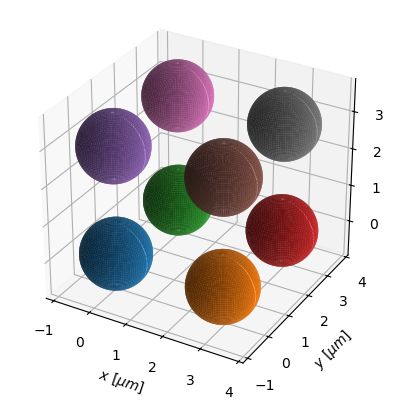

In [51]:
import biosspheres.quadratures.sphere as quadratures
import matplotlib.pyplot as plt
from matplotlib import cm, colors
quantity_theta_points, quantity_phi_points, weights, pre_vector = quadratures.gauss_legendre_trapezoidal_2d(50)
vector = pre_vector * radii[0]
fig = plt.figure()
ax_1 = fig.add_subplot(111, projection='3d')
for s in np.arange(0,n):
    ax_1.plot_surface(
        vector[0, :, :]+center_positions[s][0],
        vector[1, :, :]+center_positions[s][1],
        vector[2, :, :]+center_positions[s][2],
        rstride=1, cstride=1)
ax_1.set_xlabel('$x \\ [\\mu m]$')
ax_1.set_ylabel('$y \\ [\\mu m]$')
ax_1.set_zlabel('$z \\ [\\mu m]$')
ax_1.set_aspect('equal')
plt.show()

Definition of the numpy array containing $\sigma_j$. In this example, we will make only $\sigma_0$ different:

In [47]:
sigmas = np.ones(n+1) * 0.75
sigmas[0] = 1.75

Finally, the definition of the point source vector:

In [48]:
p0 = np.ones(3)*-5.
p0

array([-5., -5., -5.])

### `mtf_laplace_n_spheres_point_source_direct_solver`

Now, we solve using a direct solver

In [49]:
import biosspheres.formulations.mtf.solvertemplates as solver
traces = solver.mtf_laplace_n_spheres_point_source_direct_solver(n, big_l, big_l_c, radii, center_positions, sigmas, p0)

The following is a plot of the exterior dirichlet traces:

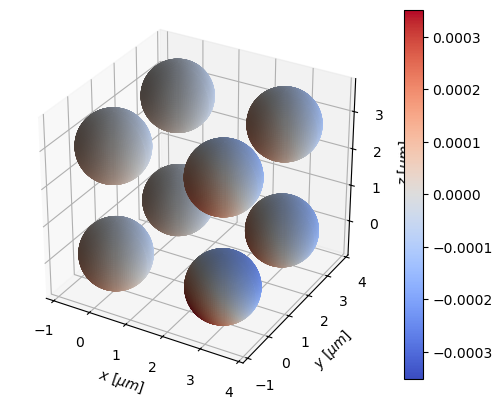

In [57]:
import biosspheres.miscella.auxindexes as auxindexes
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = auxindexes.pes_y_kus(big_l)
quantity_theta_points, quantity_phi_points, \
    weights, pre_vector, spherical_harmonics = \
    quadratures.gauss_legendre_trapezoidal_real_sh_mapping_2d(
        big_l, big_l_c, pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q)
vector = pre_vector * radii[0]
num = (big_l + 1)**2
surface_d0 = np.zeros((n, quantity_theta_points, quantity_phi_points))
for s in np.arange(0, n):
    surface_d0[s, :, :] = np.sum(
        traces[num*s:num*(s+1), np.newaxis, np.newaxis]
        * spherical_harmonics, axis=0)
surface_d0_max = np.max(np.abs(surface_d0))
surface_d0 = (surface_d0 + surface_d0_max) / (2. * surface_d0_max)

fig = plt.figure()
ax_1 = fig.add_subplot(111, projection='3d')
for s in np.arange(0,n):
    ax_1.plot_surface(
        vector[0, :, :]+center_positions[s][0],
        vector[1, :, :]+center_positions[s][1],
        vector[2, :, :]+center_positions[s][2],
        rstride=1, cstride=1, 
        facecolors=cm.coolwarm(surface_d0[s, :, :]))
ax_1.set_xlabel('$x \\ [\\mu m]$')
ax_1.set_ylabel('$y \\ [\\mu m]$')
ax_1.set_zlabel('$z \\ [\\mu m]$')
ax_1.set_aspect('equal')
fig.colorbar(cm.ScalarMappable(
    norm=colors.CenteredNorm(halfrange=surface_d0_max), cmap=cm.coolwarm),
    ax=ax_1)
plt.show()

### `mtf_laplace_n_spheres_point_source_indirect_solver`

Now, we solve using the `scipy.sparse.linalg.gmres`. This time, we have to specify a tolerance:

In [58]:
tolerance = 10**(-10)

In [59]:
import biosspheres.formulations.mtf.solvertemplates as solver
traces_2 = solver.mtf_laplace_n_spheres_point_source_indirect_solver(n, big_l, big_l_c, radii, center_positions, sigmas, p0, tolerance)

Let us see the difference between the solutions:

In [61]:
np.linalg.norm(traces-traces_2)

6.452776838700234e-13

We did not measure the time, but the iterative solution was better in terms of time and memory.